In [31]:
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import time
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("white")

pandas2ri.activate()

In [ ]:
data_file = "data/CHGdataSIMPA5043AG.txt"
basin_file = "data/CHGbasins5043AG.txt"

In [32]:
# Defining the R script and loading the instance in Python
r = robjects.r
r['source']('exec_optim.R')

# Loading the function we have defined in R.
robjects.globalenv['init_global'](data_file, basin_file)
exec_function_r = robjects.globalenv['hydro_prob']

In [38]:
result_path = "results/new_data/"
problem_type = "simple_5043"

result_files = [
    (f"./{result_path}config_{problem_type}_0_MSE.csv",0,"MSE"),
    (f"./{result_path}config_{problem_type}_1_MSE.csv",1,"MSE"),
    (f"./{result_path}config_{problem_type}_2_MSE.csv",2,"MSE"),
    (f"./{result_path}config_{problem_type}_3_MSE.csv",3,"MSE"),
    (f"./{result_path}config_{problem_type}_0_NSE.csv",0,"NSE"),
    (f"./{result_path}config_{problem_type}_1_NSE.csv",1,"NSE"),
    (f"./{result_path}config_{problem_type}_2_NSE.csv",2,"NSE"),
    (f"./{result_path}config_{problem_type}_3_NSE.csv",3,"NSE"),
    (f"./{result_path}config_{problem_type}_0_R2.csv",0,"R2"),
    (f"./{result_path}config_{problem_type}_1_R2.csv",1,"R2"),
    (f"./{result_path}config_{problem_type}_2_R2.csv",2,"R2"),
    (f"./{result_path}config_{problem_type}_3_R2.csv",3,"R2"),
    (f"./{result_path}config_{problem_type}_0_KGE.csv",0,"KGE"),
    (f"./{result_path}config_{problem_type}_1_KGE.csv",1,"KGE"),
    (f"./{result_path}config_{problem_type}_2_KGE.csv",2,"KGE"),
    (f"./{result_path}config_{problem_type}_3_KGE.csv",3,"KGE"),
]

for file_name, model, target in result_files:
    print(file_name, "Yes" if os.path.exists(file_name) else "No")

./results/new_data/config_simple_5043_0_MSE.csv Yes
./results/new_data/config_simple_5043_1_MSE.csv Yes
./results/new_data/config_simple_5043_2_MSE.csv Yes
./results/new_data/config_simple_5043_3_MSE.csv Yes
./results/new_data/config_simple_5043_0_NSE.csv Yes
./results/new_data/config_simple_5043_1_NSE.csv Yes
./results/new_data/config_simple_5043_2_NSE.csv Yes
./results/new_data/config_simple_5043_3_NSE.csv Yes
./results/new_data/config_simple_5043_0_R2.csv Yes
./results/new_data/config_simple_5043_1_R2.csv Yes
./results/new_data/config_simple_5043_2_R2.csv Yes
./results/new_data/config_simple_5043_3_R2.csv Yes
./results/new_data/config_simple_5043_0_KGE.csv Yes
./results/new_data/config_simple_5043_1_KGE.csv Yes
./results/new_data/config_simple_5043_2_KGE.csv Yes
./results/new_data/config_simple_5043_3_KGE.csv Yes


In [40]:

eval_df = pd.DataFrame(columns=["model", "target", "MSE", "RMSE", "Pbias", "NSE", "R2", "KGE", "params"])
params_list = []
for file_name, model, target in result_files:
    print(file_name, "Yes" if os.path.exists(file_name) else "No")
    params = np.loadtxt(file_name, delimiter=",", max_rows=1)
    params_list.append(",".join(map(str, params)))
    
    metrics = exec_function_r(model, params)
    param_str = np.array2string(params, max_line_width=np.inf, separator=";").replace(" ", "")
    eval_df.loc[len(eval_df)] = [model, target] + list(metrics) + [param_str]
eval_df = eval_df[eval_df["target"] != "R2"]
eval_df

./results/new_data/config_simple_5043_0_MSE.csv Yes
./results/new_data/config_simple_5043_1_MSE.csv Yes
./results/new_data/config_simple_5043_2_MSE.csv Yes
./results/new_data/config_simple_5043_3_MSE.csv Yes
./results/new_data/config_simple_5043_0_NSE.csv Yes
./results/new_data/config_simple_5043_1_NSE.csv Yes
./results/new_data/config_simple_5043_2_NSE.csv Yes
./results/new_data/config_simple_5043_3_NSE.csv Yes
./results/new_data/config_simple_5043_0_R2.csv Yes
./results/new_data/config_simple_5043_1_R2.csv Yes
./results/new_data/config_simple_5043_2_R2.csv Yes
./results/new_data/config_simple_5043_3_R2.csv Yes
./results/new_data/config_simple_5043_0_KGE.csv Yes
./results/new_data/config_simple_5043_1_KGE.csv Yes
./results/new_data/config_simple_5043_2_KGE.csv Yes
./results/new_data/config_simple_5043_3_KGE.csv Yes


,model,target,MSE,RMSE,Pbias,NSE,R2,KGE,params
0,0,MSE,134.277833,11.587831,-6.4,0.350154,0.412778,0.615495,[9.26256431e-01;4.77082614e+02;6.67973954e-01;...
1,1,MSE,109.551080,10.466665,-3.6,0.469821,0.482009,0.627938,[1.71058021e-01;4.71178424e+02;9.99999995e-01;...
2,2,MSE,109.550514,10.466638,-3.6,0.469823,0.482009,0.627860,[1.71362817e-01;4.71734949e+02;9.99999398e-01;...
3,3,MSE,115.768811,10.759592,-5.4,0.439730,0.474858,0.654239,[0.85444551;165.78908917;0.94019986;0.26174369...
4,0,NSE,147.830689,12.158564,-8.5,0.284564,0.395069,0.613720,[9.52562092e-01;1.17932645e+03;6.53781412e-01;...
5,1,NSE,109.873348,10.482049,-3.3,0.468261,0.477890,0.617405,[4.32340088e-02;6.08647216e+02;9.99999787e-01;...
6,2,NSE,109.079549,10.444116,-3.8,0.472103,0.485515,0.633603,[1.32952134e-01;4.46531138e+02;9.99999177e-01;...
7,3,NSE,121.890578,11.040407,-9.0,0.410103,0.462845,0.642264,[8.76049968e-01;5.41604788e+02;7.58805731e-01;...
12,0,KGE,142.263350,11.927420,-3.4,0.311508,0.457734,0.670039,[9.28339711e-01;4.68482086e+02;6.36721347e-01;...
13,1,KGE,121.030014,11.001364,-1.8,0.414268,0.507883,0.711547,[0.6968683;371.14442094;0.99997705;0.48575519;...


In [34]:
eval_df.sort_values("NSE")

,model,target,MSE,RMSE,Pbias,NSE,R2,KGE,params
4,0,NSE,147.830689,12.158564,-8.5,0.284564,0.395069,0.613720,[9.52562092e-011.17932645e+036.53781412e-014.9...
12,0,KGE,142.263350,11.927420,-3.4,0.311508,0.457734,0.670039,[9.28339711e-014.68482086e+026.36721347e-011.5...
0,0,MSE,134.277833,11.587831,-6.4,0.350154,0.412778,0.615495,[9.26256431e-014.77082614e+026.67973954e-018.3...
15,3,KGE,122.822246,11.082520,-2.4,0.405594,0.502515,0.707336,[8.53972890e-011.79431522e+029.96309427e-013.9...
7,3,NSE,121.890578,11.040407,-9.0,0.410103,0.462845,0.642264,[8.76049968e-015.41604788e+027.58805731e-015.3...
13,1,KGE,121.030014,11.001364,-1.8,0.414268,0.507883,0.711547,[0.6968683371.144420940.999977050.485755190.50...
14,2,KGE,120.291713,10.967758,-2.2,0.417841,0.512298,0.714101,[0.67775504361.341740510.999633780.507138420.5...
3,3,MSE,115.768811,10.759592,-5.4,0.439730,0.474858,0.654239,[0.85444551165.789089170.940199860.261743690.9...
5,1,NSE,109.873348,10.482049,-3.3,0.468261,0.477890,0.617405,[4.32340088e-026.08647216e+029.99999787e-014.8...
1,1,MSE,109.551080,10.466665,-3.6,0.469821,0.482009,0.627938,[1.71058021e-014.71178424e+029.99999995e-014.1...


In [41]:
eval_df.to_csv(f"{problem_type}_table.txt", index=False, quoting=csv.QUOTE_NONE)

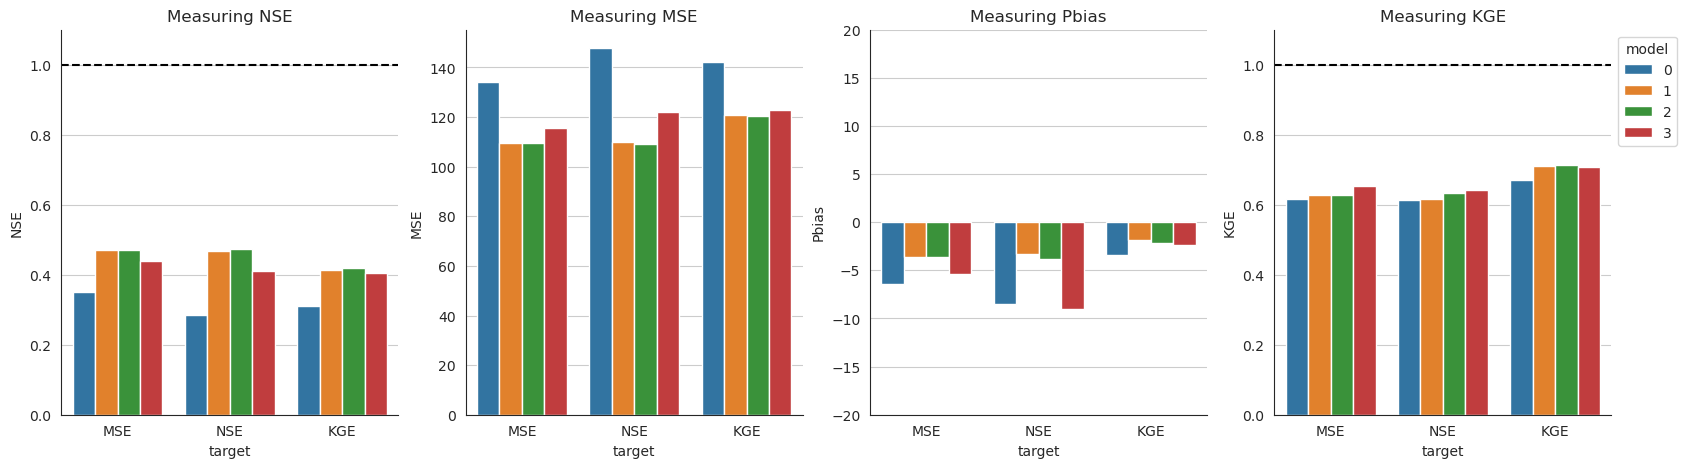

In [36]:
fig, axes = plt.subplots(1,4,figsize=(20, 5))


metric_measures = ["NSE", "MSE", "Pbias", "KGE"]
for idx, metric in enumerate(["NSE", "MSE", "Pbias", "KGE"]):
    # ax = axes[idx//2, idx%2]
    ax = axes[idx]
    # hist_ax = sns.barplot(data=data_to_plot, x="target", y=metric_measure, hue="model", ax=ax)
    hist_ax = sns.barplot(data=eval_df, x="target", y=metric_measures[idx], hue="model", ax=ax)
    hist_ax.set(title = f"Measuring {metric}")

    if metric == "NSE":
        ax.axhline(1, color="k", linestyle="--")
        hist_ax.set(ylim=(0, 1.1))
    elif metric_measures[idx] == "Pbias":
        hist_ax.set(ylim=(-20,20))
        pass
    elif metric != "MSE":
        ax.axhline(1, color="k", linestyle="--")
        hist_ax.set(ylim=(0, 1.1))
    

    if idx == 3:
        sns.move_legend(hist_ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        hist_ax.get_legend().remove()
    sns.despine()
    ax.grid(axis="y")

plt.show()